# Ciencia de datos y BigData<a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

<h1 align="center">Analítica de datos para la toma de decisiones basadas en información</h1>
<h1 align="center">Series de tiempo y detección de Outliers</h1>
<h1 align="center">2026</h1>

***
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license.
</table>
***

## Modelos generales para pronósticos a corto plazo (series de tiempo)

### Introducción

En esta sección, exploraremos los modelos de pronóstico a corto plazo (*series de tiempo*), que son herramientas esenciales en la toma de decisiones empresariales. Estos modelos nos permiten prever las tendencias futuras y hacer predicciones precisas basadas en datos históricos y patrones observados.

### Definición y Conceptos Clave

Los modelos de pronóstico a corto plazo son técnicas analíticas que se utilizan para predecir valores futuros de una variable basada en datos históricos, es decir, datos que dependen del tiempo y que generan una secuencia de observaciones en intervalos regulares de tiempo. Estos modelos son especialmente útiles cuando se busca anticipar el comportamiento en un horizonte de tiempo relativamente cercano, como días, semanas o meses. La previsión de series de tiempo tiene una enorme importancia comercial porque cosas que son importantes para un negocio como la demanda y las ventas, el número de visitantes a un sitio web, el precio de las acciones, etc., son esencialmente datos de series de tiempo. 

Una [serie de tiempo](https://en.wikipedia.org/wiki/Time_series) es una secuencia de observaciones realizadas en intervalos de tiempo regulares. Estos datos están indexados en función del tiempo y se utilizan para analizar patrones, tendencias y variabilidad a lo largo del tiempo. Las series de tiempo se encuentran en una amplia variedad de campos, como economía, finanzas, meteorología, ventas y más. Pueden ser unidimensionales (una única variable) o multidimensionales (varias variables relacionadas).

Algunos conceptos clave incluyen:

### Características de las Series Temporales

Las series temporales tienen características distintivas que las hacen diferentes de otros tipos de datos. Algunas de las características clave incluyen:

- ***Dependencia temporal:*** Los datos en una serie temporal están correlacionados a lo largo del tiempo. Las observaciones futuras dependen de las observaciones pasadas.
<p>&nbsp;</p>

- ***[Auto-correlación:](https://en.wikipedia.org/wiki/Autocorrelation)*** Existe una correlación entre los valores en diferentes momentos de tiempo. Esto significa que los valores pasados pueden ayudarnos a predecir los valores futuros.


### Componentes temporales

Las series temporales a menudo pueden descomponerse en componentes de tendencia, estacionalidad y ruido. La tendencia representa la dirección general de los datos, la estacionalidad refleja patrones recurrentes a lo largo del tiempo y el ruido representa la variabilidad no sistemática.
<p>&nbsp;</p>


- ***Tendencia:*** Se refiere a la dirección general en la que los datos se mueven a lo largo del tiempo. Puede ser ascendente (crecimiento) o descendente (declive). La identificación de la tendencia es fundamental para comprender el comportamiento subyacente de los datos. Las tendencias pueden ser lineales o no lineales y pueden ser afectadas por factores económicos, sociales y tecnológicos.
<p>&nbsp;</p>

- ***Estacionalidad:*** La [estacionalidad](https://en.wikipedia.org/wiki/Seasonality) se refiere a patrones recurrentes que ocurren en intervalos regulares dentro de una serie de tiempo. Estos patrones suelen estar asociados con factores estacionales, como las estaciones del año, días de la semana o eventos regulares. La estacionalidad puede ser aditiva o multiplicativa. Una estacionalidad aditiva significa que el efecto estacional se suma al nivel base de la serie, mientras que una estacionalidad multiplicativa significa que el efecto estacional se multiplica por el nivel base.
<p>&nbsp;</p>

- ***Componente Residual:*** El componente residual es la parte de una serie de tiempo que no puede ser explicada por la tendencia o la estacionalidad. Representa el ruido aleatorio, las fluctuaciones y las influencias impredecibles en los datos. El análisis del componente residual es importante para evaluar si un modelo de pronóstico está capturando adecuadamente las variaciones no explicadas.

***Ejemplo:***

En el siguiente código veamos cómo se visualiza la descomposición de la tendencia, estacionalidad y componente residual, empleando la función [`seasonal_decompose`](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) de la biblioteca `statsmodels` de `python`. 

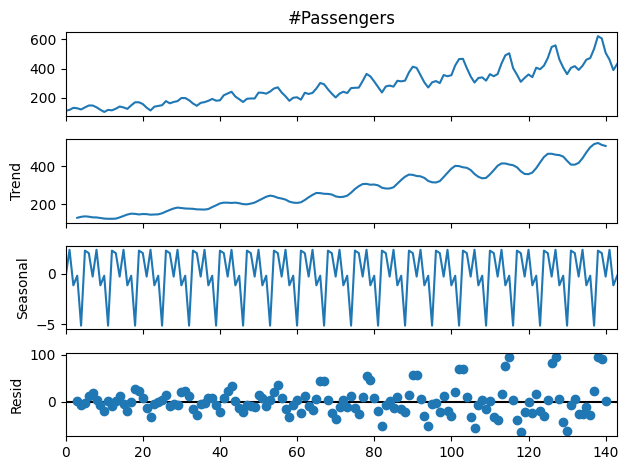

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv("Data/AirPassengers.csv")

decompose = seasonal_decompose(data['#Passengers'],model='additive', period=7)
decompose.plot()
plt.show()

In [12]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [14]:
# Cargar datos de una serie temporal desde un archivo CSV
data['Month'] = pd.to_datetime(data['Month'])

In [15]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [17]:
data.set_index('Month', inplace=True)

In [18]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### Preparación de Datos

La calidad de los datos y su adecuada preparación son fundamentales para obtener pronósticos precisos y resultados significativos.

#### Limpieza de Datos

- ***Eliminación de valores atípicos:*** Los valores extremos pueden afectar negativamente el rendimiento de los modelos. Identificar y eliminarlos es esencial.
<p>&nbsp;</p>

- ***Detección y tratamiento de valores atípicos:*** Es importante identificar y tratar valores atípicos de manera adecuada, ya sea eliminándolos, suavizándolos o asignándoles un valor más apropiado.
<p>&nbsp;</p>

- ***Resolución de duplicados:*** Si hay duplicados en los datos, es necesario manejarlos para evitar problemas en el análisis.

####  Manejo de Valores Faltantes

- ***Interpolación:*** Puedes utilizar métodos de interpolación para estimar los valores faltantes a partir de los valores circundantes.
<p>&nbsp;</p>

- ***Relleno con valores medios o medianas:*** En algunos casos, rellenar los valores faltantes con la media o la mediana de la serie puede ser apropiado.
<p>&nbsp;</p>

- ***Eliminación de registros con valores faltantes:*** Si la cantidad de valores faltantes es pequeña en comparación con la longitud de la serie, puedes optar por eliminar los registros con valores faltantes.

#### Transformación de Datos

Las transformaciones de datos son útiles para estabilizar la varianza, hacer que la serie sea estacionaria o reducir la tendencia. Algunas técnicas comunes incluyen:

- ***Transformación logarítmica:*** Puedes aplicar una transformación logarítmica a la serie si tiene una tendencia exponencial o creciente.
<p>&nbsp;</p>

- ***Diferenciación:*** La diferenciación implica calcular la diferencia entre valores consecutivos para eliminar la tendencia. Puedes realizar una diferenciación de primer o segundo orden, según sea necesario.
<p>&nbsp;</p>

- ***Eliminación de estacionalidad:*** Para series con patrones estacionales, puedes eliminar la estacionalidad dividiendo cada punto de datos por el valor del mismo período en el año anterior.

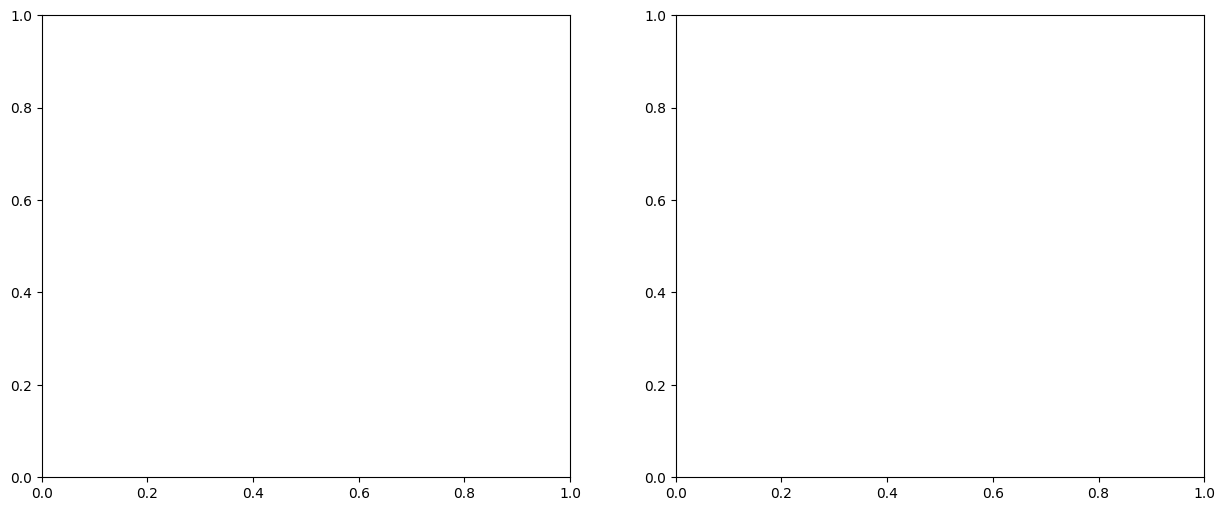

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Realizar una transformación logarítmica
data['#Passengers_log'] = data['#Passengers'].apply(lambda x: np.log(x))

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Visualizar la serie temporal original
axes[0].plot(data['Month'], data['#Passengers'], marker='o', linestyle='-')
axes[0].set_title('Serie Temporal Original')
axes[0].set_ylabel('#Passengers')
axes[0].grid(True)

# Realizar una diferenciación estacional de primer orden (12 meses)
data['#Passengers_diff'] = data['#Passengers'] - data['#Passengers'].shift(12)
axes[1].plot(data['Month'], data['#Passengers_diff'], marker='o', linestyle='-')
axes[1].set_title('Diferenciación Estacional (12 meses)')
axes[1].set_ylabel('Diferencia')
axes[1].grid(True)

# Establecer el formato del eje x para mostrar etiquetas cada 5 años
for ax in axes:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, 12*5))  # Muestra las etiquetas cada 5 años (5*12 = 60 meses)

plt.tight_layout()
plt.show()


### Análisis Exploratorio de Datos

El análisis exploratorio de datos en series temporales es fundamental para comprender la estructura y los patrones inherentes a los datos antes de desarrollar modelos de pronóstico. En esta sección, exploraremos cómo llevar a cabo este análisis utilizando Python.

#### Visualización de la Serie Temporal

La visualización de la serie temporal es el primer paso en el análisis exploratorio. Algunas de las técnicas comunes de visualización incluyen:

- ***Gráficos de líneas:*** Visualizar la serie temporal en un gráfico de líneas para observar la tendencia y cualquier patrón estacional.
<p>&nbsp;</p>

- ***Histogramas:*** Analizar la distribución de los datos para comprender su forma y simetría.  
<p>&nbsp;</p>

- ***Gráficos de autocorrelación:*** Identificar la dependencia temporal entre los valores observados en diferentes momentos.


####  Descomposición de la Serie

La descomposición de la serie implica dividirla en sus componentes principales, que suelen incluir:

- ***Componente de tendencia:*** La dirección general de los datos a lo largo del tiempo. Puede ser ascendente, descendente o plano.
<p>&nbsp;</p>

- ***Componente de estacionalidad:*** Patrones que se repiten en intervalos regulares, como estacionalidad mensual o anual.
<p>&nbsp;</p>

- ***Componente de ruido:*** La variabilidad no sistemática que no se atribuye a la tendencia o la estacionalidad.

La descomposición ayuda a identificar patrones más claramente y facilita el modelado posterior.


#### Identificación de Patrones y Estacionalidad

En este paso, se busca identificar patrones y estacionalidad en la serie temporal. Esto puede incluir:

- Patrones estacionales recurrentes a lo largo del año o de un período más corto.
<p>&nbsp;</p>

- Tendencias a largo plazo, que pueden ser ascendentes o descendentes.
<p>&nbsp;</p>
- Ciclos, que representan patrones recurrentes pero no necesariamente de duración fija.


### Modelos Autoregresivos (AR)

Los [modelos autoregresivos](https://en.wikipedia.org/wiki/Autoregressive_model) (*AR*) son una parte fundamental del análisis de series temporales. En esta sección, exploraremos los conceptos clave relacionados con los modelos AR y cómo implementarlos en Python.

Los modelos *AR* son un tipo de modelo estadístico utilizado en el análisis de series temporales. La idea central de un modelo *AR* es que el valor actual de la serie temporal depende linealmente de sus valores anteriores. El orden de un modelo *AR* se denota como "$p$" y se refiere al número de períodos de retraso en los que se basa la predicción. Un modelo $AR(p)$ se puede expresar como:

$$
X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + \varepsilon_t
$$

Donde:
- $X_t$ es el valor en el tiempo \(t\).
- $c$ es una constante.
- $\phi_1, \phi_2, \ldots, \phi_p$ son los coeficientes de autoregresión.
- $\varepsilon_t$ es el término de error en el tiempo $t$.

***Identificación del Orden de un Modelo AR***

Para identificar el orden apropiado de un modelo $AR(p$), se pueden utilizar técnicas como el *análisis de autocorrelación* (*ACF*) y el *análisis de autocorrelación parcial* (*PACF*). Estas técnicas ayudan a determinar cuántos lags anteriores son significativos y, por lo tanto, deben incluirse en el modelo.

***Estimación de Parámetros (Método de Máxima Verosimilitud)***

La estimación de los coeficientes de autoregresión $(\phi_1, \phi_2, \ldots, \phi_p$) se realiza típicamente mediante el método de *máxima verosimilitud*. Este método busca encontrar los valores de los coeficientes que maximizan la verosimilitud de los datos observados dadas las suposiciones del modelo *AR*.

***Predicción utilizando un Modelo AR***

Una vez que se ha estimado un modelo *AR*, se puede utilizar para hacer pronósticos a corto plazo. Los valores futuros se calculan utilizando los valores pasados y los coeficientes estimados del modelo AR. La predicción se realiza iterativamente utilizando valores previos.

***Ejemplo Aplicativo en Python***

A continuación, presento un ejemplo aplicativo en Python que implementa y realiza pronósticos con un modelo AR utilizando la biblioteca `statsmodels`:

In [ ]:
data.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Cargar datos de una serie temporal desde un archivo CSV
#data['Month'] = pd.to_datetime(data['Month'])
#data.set_index('Month', inplace=True)

# Visualizar la serie temporal
plt.figure(figsize=(10, 4))
plt.plot(data['#Passengers'], marker='o', linestyle='-')
plt.title('Serie Temporal Original')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.grid(True)
plt.show()

# Estimar un modelo AR con orden 2
order = 2
model = AutoReg(data['#Passengers'], lags=order)
results = model.fit()

# Realizar pronósticos
n_forecast = 12  # Número de periodos a pronosticar
forecast = results.predict(start=len(data), end=len(data) + n_forecast - 1, dynamic=False)

# Visualizar los pronósticos
plt.figure(figsize=(10, 4))
plt.plot(data['#Passengers'], marker='o', linestyle='-', label='Observado')
plt.plot(forecast, marker='o', linestyle='--', color='red', label='Pronóstico')
plt.title('Pronóstico con Modelo AR(2)')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.legend()
plt.grid(True)
plt.show()


Este ejemplo carga una serie temporal, estima un modelo AR(2) y realiza pronósticos para los próximos 12 periodos. Los resultados se visualizan junto con los datos observados en un gráfico.

Este es un resumen de cómo se pueden utilizar los modelos AR para realizar pronósticos en series temporales. La identificación del orden y la estimación de los parámetros son pasos críticos en este proceso.

### Procedimiento de Trabajo y Casos de Uso

- ***Recopilación de Datos:*** Recolectar datos históricos en intervalos de tiempo regulares.
<p>&nbsp;</p>

- ***Exploración y Visualización:*** Graficar los datos para identificar tendencias y patrones estacionales. Esto puede incluir trazar la serie de tiempo, calcular estadísticas descriptivas y detectar valores atípicos.
<p>&nbsp;</p>

- ***Descomposición:*** Descomponer la serie de tiempo en sus componentes clave: tendencia, estacionalidad y componente residual.
<p>&nbsp;</p>

- ***Modelado y Pronóstico:*** Utilizar métodos de pronóstico adecuados, como Suavización Exponencial, ARIMA, regresión, etc., para predecir los valores futuros basados en los componentes identificados.
<p>&nbsp;</p>

- ***Evaluación y Ajuste:*** Evaluar el rendimiento del modelo utilizando indicadores como MAE, MSE, RMSE y MAPE. Ajustar el modelo si es necesario para mejorar la precisión.

#### Ventajas y Desventajas

***Ventajas:***

- ***Toma de Decisiones Informadas:*** Los modelos de pronóstico ayudan a tomar decisiones empresariales basadas en datos históricos y patrones observados.
<p>&nbsp;</p>

- ***Anticipación de Tendencias:*** Permite anticipar tendencias futuras y comportamientos estacionales, lo que ayuda a planificar y optimizar recursos.
<p>&nbsp;</p>

- ***Análisis de Impacto:*** Permite evaluar el impacto de cambios en variables clave en el futuro.

***Desventajas:***

- ***Datos Insuficientes:*** Los modelos de pronóstico requieren una cantidad suficiente de datos históricos para ser efectivos. En situaciones con datos limitados, la precisión puede ser baja.
<p>&nbsp;</p>

- ***Incertidumbre:*** Los modelos de pronóstico no pueden predecir eventos inesperados o disruptivos, lo que puede afectar la precisión de las predicciones.
<p>&nbsp;</p>

- ***Sensibilidad a Cambios:*** Los modelos pueden ser sensibles a cambios abruptos en los datos históricos, lo que puede generar predicciones inexactas.

#### Aspectos a Considerar en el Análisis

- ***Tamaño de la Muestra:*** Es importante tener suficientes datos históricos para desarrollar modelos confiables.
<p>&nbsp;</p>

- ***Identificación de Patrones:*** Buscar tendencias y estacionalidades en los datos para seleccionar el modelo adecuado.
<p>&nbsp;</p>

- ***Ajuste de Parámetros:*** Algunos modelos, como ARIMA, requieren ajuste de parámetros. La selección incorrecta puede afectar la calidad del pronóstico.
<p>&nbsp;</p>

- ***Validación Cruzada:*** Utilizar técnicas como la validación cruzada para evaluar la capacidad del modelo para generalizar a nuevos datos.
<p>&nbsp;</p>

- ***Evaluación Continua:*** Los modelos deben ser evaluados y ajustados regularmente a medida que llegan nuevos datos para garantizar su precisión continua.

Ver ejemplo en el archivo [EL460_Ejemplos_C02_5_TimeSeriesAnalysis.ipynb](./EL460_Ejemplos_C02_5_TimeSeriesAnalysis.ipynb)

## Identificación de datos raros (outliers) y métodos explicativos en presencia de datos raros no identificados (Regresión robusta)

### Introducción

 En esta sección, exploraremos cómo lidiar con un desafío común en el análisis de datos: los datos raros (outliers) y cómo afectan nuestros modelos predictivos. Además, aprenderemos sobre una técnica poderosa llamada regresión robusta que nos permite construir modelos de predicción confiables incluso en presencia de datos raros.

### Identificación de Datos Raros (Outliers)

#### Definición y Concepto

Los datos raros, también conocidos como [outliers](https://en.wikipedia.org/wiki/Outlier), son observaciones que se desvían significativamente del patrón general de los datos en un conjunto. Estos valores atípicos pueden surgir debido a errores de medición, eventos inusuales o simplemente representar casos extremadamente inusuales. La identificación de outliers es crucial ya que pueden tener un impacto adverso en nuestros modelos predictivos al sesgar los resultados y afectar la interpretación.

 #### Indicadores para la Identificación de Outliers

Para identificar datos raros, utilizamos diferentes indicadores y técnicas:

##### Gráficos de Dispersión

Los gráficos de dispersión nos permiten visualizar la relación entre dos variables. Los outliers pueden aparecer como puntos aislados en el gráfico.

##### Diagrama de Caja (Boxplot)

Los diagramas de caja son herramientas visuales que resumen la distribución de un conjunto de datos, mostrando la mediana, cuartiles y posibles valores atípicos. Los puntos fuera de los "bigotes" del diagrama se consideran outliers.

##### Z-Score y Puntuación T

El [Z-Score](https://en.wikipedia.org/wiki/Standard_score) y la [puntuación T](https://en.wikipedia.org/wiki/Student%27s_t-test) (*t-student*) son medidas que indican cuántas desviaciones estándar una observación está lejos de la media. Valores altos en estas métricas pueden indicar outliers potenciales.

##### Rango Intercuartílico (IQR)

El *IQR* es la diferencia entre el tercer cuartil y el primer cuartil en un diagrama de caja. Los valores fuera de $1.5$ veces el *IQR* por encima del tercer cuartil o por debajo del primer cuartil son considerados outliers.

### Regresión Robusta

#### Desafíos de la Regresión Clásica

En la regresión clásica, estamos asumiendo que los datos siguen una distribución normal y que los outliers tienen un impacto limitado en nuestros resultados. Sin embargo, esto no siempre es cierto en la realidad. Los outliers pueden distorsionar severamente los coeficientes de regresión y hacer que nuestros modelos sean poco confiables.

#### Introducción a la Regresión Robusta

La [regresión robusta](https://en.wikipedia.org/wiki/Robust_regression) es una técnica que aborda los desafíos de los outliers al construir modelos de predicción más sólidos. A diferencia de la regresión clásica, la regresión robusta asigna menos peso a los datos que son influenciados por outliers, lo que permite que el modelo se adapte mejor a los patrones reales de los datos.

#### Métodos de Regresión Robusta

##### M-Estimadores

Los [M-Estimadores](https://en.wikipedia.org/wiki/M-estimator) son una clase de técnicas de regresión robusta que minimizan una función objetivo que combina la suma de residuos ponderados. Esto hace que el modelo sea menos sensible a los outliers.

##### Regresión MM (Mínimos Cuadrados Medianamente Ponderados)

Esta técnica combina las ventajas de los M-Estimadores y la mediana, lo que la hace más robusta en presencia de datos con outliers.

##### Regresión Huber

La [regresión Huber](https://en.wikipedia.org/wiki/Huber_loss) (*Huber loss*) utiliza una función de pérdida que es cuadrática cerca del origen y lineal lejos del origen. Esto permite que tenga un comportamiento robusto en la presencia de outliers sin descartar por completo su influencia.

### Ejemplo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Generar datos sintéticos con outliers
np.random.seed(42)
n = 100
X = np.random.rand(n)
y = 2*X + 1 + 0.2*np.random.randn(n)
y[95] = 30  # Introducir un outlier

# Gráfico de dispersión
plt.scatter(X, y)
plt.title('Gráfico de Dispersión con Outlier')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Calcular Z-Score
z_scores = np.abs(stats.zscore(y))

# Calcular puntuación T
t_scores = np.abs((y - np.mean(y)) / np.std(y))

# Diagrama de Caja
plt.boxplot(y)
plt.title('Diagrama de Caja')
plt.show()

# Regresión clásica
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()

# Regresión robusta usando M-Estimadores
robust_model = sm.RLM(y, X_constant).fit()

# Imprimir resultados
print("Resultados de la Regresión Clásica:")
print(model.summary())

print("\nResultados de la Regresión Robusta (M-Estimadores):")
print(robust_model.summary())


#### Análisis de Resultados

***Regresión clásica:***

| item  |  coef     | std err  |      t    |    P>t     |    [0.025 |   0.975]|
|:-----:|:---------:|:--------:|:---------:|:----------:|:--------:|:-------:|
|const  |  1.2891   |   0.530  |    2.434  |    0.017   |    0.238 |    2.340|
|x1     |  1.9840   |   0.953  |    2.082  |    0.040   |    0.093 |    3.875|


|Estadístico                 |  valor  | Estadístico                | Valor     |
|:--------------------------:|:-------:|:--------------------------:|:---------:|
|Omnibus:                    |  215.266| Durbin-Watson:             |      2.035|
|Prob(Omnibus):              |    0.000| Jarque-Bera (JB):          |  38566.153|
|Skew:                       |    9.787| Prob(JB):                  |       0.00|
|Kurtosis:                   |   97.195| Cond. No.                  |       4.18|

En resumen, la interpretación de los resultados es la siguiente:

- Los valores $t$ y los valores $p$ indican la significancia estadística de los coeficientes. En este caso, el coeficiente del intercepto es estadísticamente significativo al nivel de significancia del $0.05$ ($p = 0.017$), mientras que el coeficiente de $x1$ es también significativo al mismo nivel ($p = 0.040$).

- Los intervalos de confianza proporcionan un rango en el cual es probable que se encuentre el valor real del coeficiente en la población.

- Las estadísticas de diagnóstico en la parte inferior de la tabla pueden ayudar a evaluar la calidad del ajuste del modelo y la validez de las suposiciones. Por ejemplo, un valor $p$ bajo en *Omnibus* y un valor alto en *Jarque-Bera* pueden indicar problemas con la normalidad de los residuos. El valor de *Durbin-Watson* se refiere a la autocorrelación en los residuos.

En resumen, estos resultados sugieren que los coeficientes son significativos, pero los diagnósticos indican que el modelo podría tener problemas con la normalidad de los residuos y la posible autocorrelación. La regresión robusta podría proporcionar una estimación más confiable en este caso.

***Regresión Robusta:***

| item  |  coef     | std err  |      z    |    P>z     |    [0.025 |   0.975]|
|:-----:|:---------:|:--------:|:---------:|:----------:|:--------:|:-------:|
|const  |    1.0423 |    0.036 |    28.603 |      0.000 |    0.971       1.114
|x1     |    1.9106 |    0.066 |    29.132 |      0.000 |    1.782       2.039

- El valor "$z$" se calcula dividiendo el coeficiente por su error estándar, y el valor $p$ ($p>|z|$) representa la probabilidad de observar un valor $z$ igual o mayor si el coeficiente no tuviera ningún efecto en la variable dependiente. En este caso, los valores $p$ asociados con ambos coeficientes son $0.000$, lo que sugiere que tanto el intercepto como el coeficiente de $x1$ son estadísticamente significativos.

En resumen, estos resultados confirman que tanto el intercepto como el coeficiente de la variable independiente son significativos en el modelo de regresión robusta utilizando *M-Estimadores*. Además, la regresión robusta ayuda a mitigar el impacto potencial de los outliers en los coeficientes estimados, proporcionando resultados más confiables en presencia de datos raros

Ver ejemplo en el archivo [EL460_Ejemplos_C02_6_Outliers.ipynb](./EL4660_Ejemplos_C02_6_Outliers.ipynb)